#Libraries and data

In [ ]:
!pip install tbats

In [2]:
%cd /content/drive/MyDrive/Forecasting Models and Time Series for Business in Python/4. TBATS

/content/drive/MyDrive/Forecasting Models and Time Series for Business in Python/4. TBATS


In [3]:
#Import libraries
import pandas as pd
import numpy as np

In [7]:
#get the data
df = pd.read_csv("daily-footfall.csv", 
                 index_col = "WeekBeginning")
df.head()

,AveragePerDay
WeekBeginning,
3/1/2016,235
10/1/2016,231
17/01/2016,233
24/01/2016,224
31/01/2016,224


In [8]:
#index 
df.index = pd.to_datetime(df.index,
                          format = "%d/%m/%Y")
df.index

DatetimeIndex(['2016-01-03', '2016-01-10', '2016-01-17', '2016-01-24',
               '2016-01-31', '2016-02-07', '2016-02-14', '2016-02-21',
               '2016-02-28', '2016-03-06',
               ...
               '2017-10-22', '2017-10-29', '2017-11-05', '2017-11-12',
               '2017-11-19', '2017-11-26', '2017-12-03', '2017-12-10',
               '2017-12-17', '2017-12-24'],
              dtype='datetime64[ns]', name='WeekBeginning', length=103, freq=None)

#Preparation

In [9]:
#transform index
df = df.asfreq("W")
df.index

DatetimeIndex(['2016-01-03', '2016-01-10', '2016-01-17', '2016-01-24',
               '2016-01-31', '2016-02-07', '2016-02-14', '2016-02-21',
               '2016-02-28', '2016-03-06',
               ...
               '2017-10-22', '2017-10-29', '2017-11-05', '2017-11-12',
               '2017-11-19', '2017-11-26', '2017-12-03', '2017-12-10',
               '2017-12-17', '2017-12-24'],
              dtype='datetime64[ns]', name='WeekBeginning', length=104, freq='W-SUN')

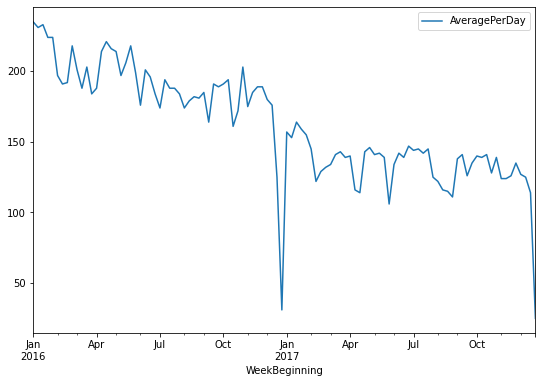

In [12]:
#Viz
df.plot(figsize = (9,6))

In [11]:
#fill NA
df = df.fillna(method = 'ffill')

In [13]:
#Training and test set
test_weeks = 5
training_set = df.iloc[:-test_weeks,:]
test_set = df.iloc[-test_weeks:,:]

#TBATS

In [14]:
#TBATS
from tbats import TBATS 
model = TBATS(seasonal_periods = [52]).fit(training_set.AveragePerDay)

In [16]:
#predictions
predictions = pd.Series(model.forecast(steps = test_weeks)).rename("TBATS")
predictions.index = test_set.index
predictions.head(2)

WeekBeginning
2017-11-26    142.421047
2017-12-03    149.637739
Freq: W-SUN, Name: TBATS, dtype: float64

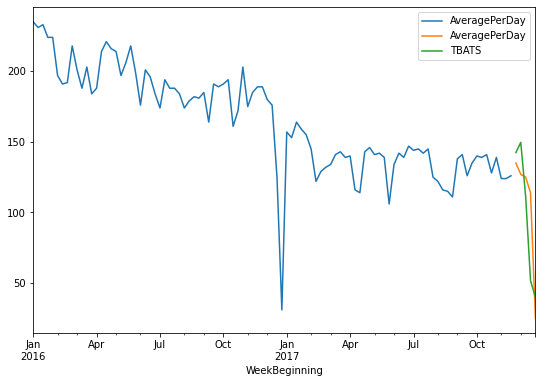

In [18]:
#plotting
training_set.AveragePerDay.plot(figsize = (9,6), legend = True)
test_set.AveragePerDay.plot(legend = True)
predictions.plot(legend = True)

In [19]:
#RMSE
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(test_set.AveragePerDay,
                           predictions))

31.12156474734101